# Classification
## Quick Detour, Nearest Neighbours

Before we use Scikit Learn (a library for doing machine learning), we'll quickly look at how we might write a nearest neighbour classifier by hand.

First we load some data. We have three arrays, the children's z-scores, their MUAC values and whether or not they are OK.

We will use all but the last child to 'train' the nearest neighbour, and the last child to test it.

In [16]:
import numpy as np

#The nutrition data
zscore=np.array([-1.59,-0.06,-2.11,0.57,1.35,0.03,0.11,-0.37,2.66,-1.24,-0.03,0.03,-0.53,3.06,1.97,1.01,0.51,-1.36,-1.44,1.45,2.55,0.4,1.03,1.72,1.,0.67,1.19,0.59,0.86,-2.16,0.87,-2.27,0.04,1.14,-0.78,1.76,-1.05,-0.7,1.58,0.11,-0.34,-2.89,0.37,0.77,0.61,-0.68,0.,-1.33])
muac=np.array([84.5,86.6,87.2,88.5,91.3,92.4,92.4,92.8,93.3,94.4,95.2,97.4,101.4,101.5,106.1,109.5,110.8,110.9,113.3,113.6,113.6,114.2,114.8,116.,116.8,117.9,119.1,119.8,122.,122.7,123.7,124.5,124.8,125.7,126.3,129.5,130.3,131.,132.5,132.5,136.5,138.,140.,140.4,143.6,146.5,146.7,146.9])
ok=np.array([False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,False,True,True,False,True,True,True,True,True,True,True,False,True,False,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True])

Nearest neighbour simply involves calculating the **distance** from the test point, to all the training points. We can find the distance of a point $x_1, y_1$ from $x_2, y_2$ by using pythagoras: 
$$\mathtt{distance} = \sqrt{ (x_1-x_2)^2 + (y_1-y_2)^2}$$

We can get the test point (the last point in the lists):

In [33]:
test_zscore = zscore[-1] #in python the -1 index means the end of the list
test_muac = muac[-1]
test_ok = ok[-1]

We need to loop through all the training inputs, and find the distance from each to the test point: We want to find the training point that's got the smallest distance to the test point.

In [63]:
smallest_distance = np.infty #this variable remembers the smallest distance that we've seen so far.
result = np.NAN #this variable remembers the associated label for that training point.

for child_zscore, child_muac, child_ok in zip(zscore,muac,ok)[0:-1]: #this means we loop through all but the last child
    distance = np.sqrt((child_zscore - test_zscore)**2 + (child_muac - test_muac)**2) #get distance from test to muac
    if distance<smallest_distance: #if it's the smallest distance we've seen, use it.
        smallest_distance = distance #we update the smallest distance with this one
        result = child_ok  #we make a note of the label of this training point
        
print("The algorithm predicts that the test point has a label: '%s'" % result)
print("The test point actually has label: '%s'" % test_ok)

The algorithm predicts that the test point has a label: 'True'
The test point actually has label: 'True'


**Exercise 0**: What is the problem with finding the distance like this? (hint, think about how much MUAC and z-scores change). How can we adjust the data to avoid this problem? Hint: Plotting them against each other might help you see the problem, which we'll do later (exercise 7).

We'll be revisiting this dataset later, but we now turn to the 'digits' dataset and scikit learn.

# Classification with Scikit Learn

## The Digit Dataset

For these classification examples we will be using scikit-learn, a toolkit for python that contains lots of methods for solving machine learning problems.

It also contains some datasets we can try out. For this exercise we'll use the 'digit' dataset. This is a set of 1797 pictures of hand-drawn digits (0,1,2,3,4,5,6,7,8,9). The challenge is whether we can get the computer to learn what the digits look like, using a training set of images, and then test the computer on a test-set of images.

Run the code below to import the digits dataset.

In [35]:
from matplotlib import pyplot as plt #plotting library (lets us draw graphs)
%matplotlib inline

from sklearn import datasets #the datasets from sklearn


digits = datasets.load_digits() #load the digits into the variable 'digits'

To get an idea of the data we are going to be classifying we'll ask what shape the 'data' matrix is:

In [36]:
digits.data.shape

(1797, 64)

This tells us that it has 1797 rows (which are the samples) and 64 columns (which are the 8x8 pixels in the data, and make up the 64 dimensions of the data set).

We can have a look at just one sample. Here I'm using python's matrix 'slicing' notation. It means I want row 35 and all the columns from that row.

In [37]:
digits.data[35,:]

array([  0.,   3.,  15.,   8.,   8.,   6.,   0.,   0.,   0.,   4.,  16.,
        16.,  16.,  13.,   2.,   0.,   0.,   3.,  16.,   9.,   2.,   0.,
         0.,   0.,   0.,   2.,  16.,  16.,  15.,   3.,   0.,   0.,   0.,
         0.,   7.,   6.,  12.,   9.,   0.,   0.,   0.,   0.,   0.,   1.,
        14.,  10.,   0.,   0.,   0.,   0.,   5.,  14.,  15.,   2.,   0.,
         0.,   0.,   1.,  15.,  14.,   1.,   0.,   0.,   0.])

Each of these numbers is one of the pixels in the image.

It's unclear what digit this image is of still.

We can draw the numbers as pixels in an image to see what image this represents:

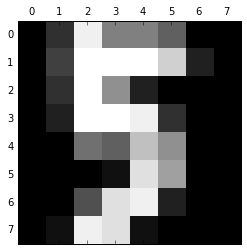

In [38]:
#code to reshape the 64 numbers into an 8x8 matrix and then draw it
plt.matshow(digits.data[35,:].reshape(8,8),cmap='gray') 

It looks like a five!

**Exercise 1:** Copy the code above into the box below, and modify it to find out what digit image 72 has inside

In [39]:
 
#Exercise 1: Your code here!






The problem is a **supervised** learning problem, which means we need to provide labels for our data points.

The labels are also in the 'digits' object. They can be accessed using 'target':

In [40]:
digits.target[35]

5

As suspected image 35 is of the digit '5'.

**Exercise 2**: What is image 72 supposed to be? Copy and alter the code above to find out.

In [41]:

#Exercise 2: Your code here!



**Exercise 3**: How many digits are of each type in the dataset?

You can plot a histogram with the following code:

    plt.hist(list_of_numbers,bins=range(11))
    
You'll need to replace "list_of_numbers" with the array you want to draw the histogram of.

The bins parameter tells the function where to draw the boundaries of the graph. We want them at each integer.    

In [42]:

 #Your code here


## Scikit Learn
In the following we'll be using the scikit library to do the classification. We need to go through two steps: **training** (fitting) and **testing** (prediction).

## Training

First we need to pick some training data:

In [43]:
training_data = digits.data[0:-10,:] #this means all but the last 10 rows should be put in training_data
training_target = digits.target[0:-10] #this puts all but the last 10 elements of the labels (targets) into training_target

#similarly this takes the last digit and puts that in test_data and test_target
test_data = digits.data[-10:,:]
test_target = digits.target[-10:]

The training step is quite simple. Here we fit the model to the data.

In [44]:
from sklearn import neighbors #import the library that we need
nn = neighbors.KNeighborsClassifier(n_neighbors=1) #this is our model (with just one nearest neighbour)
nn.fit(training_data,training_target); #fit our model to the training data

We can then predict the results using the predict method

In [45]:
nn.predict(test_data)

array([5, 4, 8, 1, 4, 9, 0, 8, 9, 8])

How many of these were correct?

In [46]:
test_target

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

Remarkably the classifier has mostly got them correct.

Below is the image that it misclassified

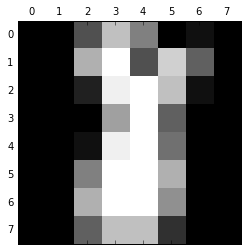

In [47]:
plt.matshow(test_data[3].reshape(8,8),cmap='gray') 

**Exercise 4**: What was the image supposed to be, and what did the classifier think it was?

In [48]:

#Exercise 4: Answer here





## Cross-validation

In the lecture I briefly mentioned leave-one-out cross-validation. The same sort of idea is called **k-fold cross-validation**. In this we split the dataset into *k* groups, and train on all but one, then test on the remaining one. Then repeat while leaving out a different group.

sklearn provides the 'KFold' object to let us organise our cross-validation. In the code below we repeatedly train and test, and report the accuracy in each fold.

**Exercise 5**: In the code below try different classifiers and see which one does best. Try modifying the parameters to see what effect they have (e.g. the number of neighbours). Put the cursor inside the parameter brackets (e.g. on the "n_neighbors=1") and press SHIFT-TAB a couple of times and a box will appear describing what the different parameters do.

In [49]:
import numpy as np

#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.cross_validation import KFold

#prepare k-fold cross validation
kf = KFold(len(digits.target), n_folds=5)
KFold(n=4, n_folds=2, shuffle=False, random_state=None)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf:
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = digits.data[train_index,:] 
    training_target = digits.target[train_index] 
    test_data = digits.data[test_index,:]
    test_target = digits.target[test_index]
    
    #TODO: Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=50, min_samples_split=1, max_depth=None, max_features=16)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=8)
    csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    #csf= svm.LinearSVC(C=0.05) #Linear Support Vector Machine classifier
    #csf = naive_bayes.GaussianNB()
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print(" ")
print("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

346 of 360 correct
343 of 360 correct
347 of 359 correct
355 of 359 correct
343 of 359 correct
 
Total: 1734 of 1797 correct (96.49%)


The nearest neighbour classifier did particularly well on the digits dataset. 

### Breast Cancer Dataset

This is the wisconsin Breast Cancer dataset. It contains measurements of different cells, some of which are cancerous and some of which are not. It's been organised in the same way as before, with bc.data containing a matrix, each row is a cell, each column a feature.

In [50]:
bc = datasets.load_breast_cancer()

bc.data[4,:] #data from row number four.

array([  2.02900000e+01,   1.43400000e+01,   1.35100000e+02,
         1.29700000e+03,   1.00300000e-01,   1.32800000e-01,
         1.98000000e-01,   1.04300000e-01,   1.80900000e-01,
         5.88300000e-02,   7.57200000e-01,   7.81300000e-01,
         5.43800000e+00,   9.44400000e+01,   1.14900000e-02,
         2.46100000e-02,   5.68800000e-02,   1.88500000e-02,
         1.75600000e-02,   5.11500000e-03,   2.25400000e+01,
         1.66700000e+01,   1.52200000e+02,   1.57500000e+03,
         1.37400000e-01,   2.05000000e-01,   4.00000000e-01,
         1.62500000e-01,   2.36400000e-01,   7.67800000e-02])

You can find out more by running this code:

In [51]:
#print(bc['DESCR']) #uncomment and run to print a description of the dataset

**Exercise 6:** Quickly try out different classifiers for the breast cancer dataset. Do the same ones do as well? If not, why not?

In [52]:
bc = datasets.load_breast_cancer()

import numpy as np
#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.cross_validation import KFold

#prepare k-fold cross validation
kf = KFold(len(bc.target), n_folds=5)
KFold(n=4, n_folds=2, shuffle=False, random_state=None)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf:
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = bc.data[train_index,:] 
    training_target = bc.target[train_index] 
    test_data = bc.data[test_index,:]
    test_target = bc.target[test_index]
    
    #TODO: Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=10, min_samples_split=1, max_depth=None, max_features=5)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=2)
    csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    #csf= svm.LinearSVC(C=1)
    #csf = naive_bayes.GaussianNB()
    
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print(" ")
print("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

97 of 114 correct
102 of 114 correct
109 of 114 correct
104 of 114 correct
104 of 113 correct
 
Total: 516 of 569 correct (90.69%)


## The Nutrition (simulated) Dataset and Munging Data

We often don't have data in quite the tidy format the above examples were in.

As a reminder we want to guess whether a child will need treatment or not, based on their MUAC and ZSCORE

In [53]:
zscore=np.array([-1.59,-0.06,-2.11,0.57,1.35,0.03,0.11,-0.37,2.66,-1.24,-0.03,0.03,-0.53,3.06,1.97,1.01,0.51,-1.36,-1.44,1.45,2.55,0.4,1.03,1.72,1.,0.67,1.19,0.59,0.86,-2.16,0.87,-2.27,0.04,1.14,-0.78,1.76,-1.05,-0.7,1.58,0.11,-0.34,-2.89,0.37,0.77,0.61,-0.68,0.,-1.33])
muac=np.array([84.5,86.6,87.2,88.5,91.3,92.4,92.4,92.8,93.3,94.4,95.2,97.4,101.4,101.5,106.1,109.5,110.8,110.9,113.3,113.6,113.6,114.2,114.8,116.,116.8,117.9,119.1,119.8,122.,122.7,123.7,124.5,124.8,125.7,126.3,129.5,130.3,131.,132.5,132.5,136.5,138.,140.,140.4,143.6,146.5,146.7,146.9])
ok=np.array([False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,False,True,True,False,True,True,True,True,True,True,True,False,True,False,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True])

#data for later exercise...
edema=np.array([True,True,True,True,True,True,True,True,False,True,False,True,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,True,False,False,True,True,False,False,False,True,False,False])

**Exercise 7**: Plot the zscores against the MUAC values

**Hint:** The command you want to use is:

    plt.scatter(A,B,marker='x',c='r')
    
where A and B are the two lists you want to plot (so you'll need to replace them). The marker parameter is optional and lets you choose the symbol in your plot. The 'c' parameter lets you choose the colour.

**Extra:** You'll notice the axes are different scales (the zscores vary less than the MUAC values). To get a better idea about this, we can ask python to plot them with equal scales. After your plot command, use this command to make them equal:

    plt.axis('equal')

In [66]:

 #Your code here!


**Exercise 8**: Can we plot the two classes in different colours?

Hint #1: First just try plotting the 'ok' children. You can get a smaller list, that just contains the ok children by selecting just the items from the lists where ok is True. This can be done with:

    zscore[ok]
    
Hint #2: To list the not ok children you can use the not-operator "~":

    zscore[~ok]
    
Hint #3: To plot both ok and not-ok children, just call the scatter function twice (one after the other)

In [55]:

 #Your code here


Finally we want to try classifying the data. First we need to get it into the matrix form that we used earlier in the notebook.

We need two matrices, one called 'data' and one called 'target'.

'data' should be a matrix with 48 rows (for the 48 children) and two columns (for the two types of data: zscore and muac). We can combine matrices like this using numpy's vstack command.

Here I've provided the code to do that for you. Much of doing data science is really about getting your data prepared into the right format and quality. The actually machine learning itself is often quite a small part of your work.

In [56]:
data = np.vstack([zscore,muac]).T #Here I combine the zscores and MUAC. # <<< Modify for exercise 7
target = np.array([1 if k else 0 for k in ok])

We can ask for the shape of the data matrix, so we can confirm we've got it in the correct shape: We have 48 children, and each one has two measurements.

In [57]:
data.shape

(48, 2)

In [58]:
import numpy as np
#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.cross_validation import KFold

#prepare k-fold cross validation
kf = KFold(len(target), n_folds=5)
KFold(n=4, n_folds=2, shuffle=False, random_state=None)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf:
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = data[train_index,:] 
    training_target = target[train_index] 
    test_data = data[test_index,:]
    test_target = target[test_index]
    
    #TODO: Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=10, min_samples_split=1, max_depth=None, max_features=5)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=2)
    #csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    csf= svm.LinearSVC(C=1)
    #csf = naive_bayes.GaussianNB()
    
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print(" ")
print("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

4 of 10 correct
6 of 10 correct
9 of 10 correct
6 of 9 correct
1 of 9 correct
 
Total: 26 of 48 correct (54.17%)


We have also been given data about whether the child has edema (fluid build-up). Can we make use of this additional data to improve our predictions?

The variable is called 'edema':

In [59]:
edema

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False], dtype=bool)

To get a quick idea of if it's useful we can as for the confusion matrix, this counts the number of times both are true, one is true and one is false, vis-versa and when they are both false.

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ok,edema)

array([[ 1, 18],
       [25,  4]])

The top row is the number of children that don't need help who have edema or not (only one child in this category has edema).
The bottom row is the number of children who need help who have edema or not. Almost all of them had edema.

Clearly this variable will be very useful in our prediction.

**Exercise 9**: Modify the code above to include this extra variable. There is a hint in a comment to help!

In [61]:

 #Modify code above







**Bonus Exercise**: Look at the other datasets in sklearn, and try out other classifiers on them. What datasets do you know of or have access to which might need classification?

**Double Bonus Exercise**: Modify the classifier code above so that it tries different values of the neighbours parameter automatically, and returns the best value of that parameter.

**Quick Quiz**

How can we avoid 'cheating' when we fit (or 'train') our model?

Name two types of classifier.

What is over fitting?

Name some features of a dataset which make one classifier work better than another?

What is the difference between supervised and unsupervised learning?

**Reminder**: The MUAC/zscore/edema data is *simulated*, but these decisions are real decisions. However, they are also heavily based on other clinical assessments of the child's health (including HIV status, TB status, diarrhea, general overall wellness, etc).